[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github.com/Ecotrust/forestvision/refs/heads/main/notebooks/demo_datasets_basic.ipynb) 

# Retrieving Google Earth Engine imagery with ForestVision

## Overview

This notebook demonstrates how to use the `ForestVision` library to retrieve satellite imagery from Google Earth Engine (GEE) and combine it with TorchGeo's native raster datasets for forest analysis applications.

### Contents:
- Setting up authentication for Google Earth Engine
- Defining regions of interest (ROIs) for analysis
- Using ForestVision's GEE datasets (Landsat 8 and Landsat FTV)
- Combining GEE data with local raster datasets
- Working with TorchGeo's spatial data structures
- Visualizing and inspecting satellite imagery

### Prerequisites:
- A Google Cloud project with Earth Engine API enabled
- Basic understanding of Python and geospatial data
- Familiarity with Jupyter notebooks

Let's get started!

## Install and Import Required Packages

First, we need to install the ForestVision library and import the necessary packages for working with Google Earth Engine and geospatial data.

In [ ]:
# Install ForestVision from the GitHub repository
%pip install git+https://github.com/Ecotrust/forestvision.git

Now let's import the required libraries:

- `os`: For operating system interactions
- `dotenv`: For loading environment variables from .env files
- `ee`: Google Earth Engine Python API
- `BoundingBox`: TorchGeo's spatial bounding box class
- `GEELandsat8` and `GEELandsatFTV`: ForestVision's GEE dataset classes

In [5]:
import os
from dotenv import load_dotenv

import ee
from torchgeo.datasets import BoundingBox
from forestvision.datasets import GEELandsat8, GEELandsatFTV

## Authenticate to Google Earth Engine

To access Google Earth Engine (GEE), you need to authenticate using a Google Cloud project with the Earth Engine API enabled. 

### Prerequisites:
1. Create a Google Cloud project (or use an existing one)
2. Enable the Earth Engine API for that project
3. Set up authentication credentials

For detailed instructions, see the [Earth Engine access guide](https://developers.google.com/earth-engine/guides/access).

### Configuration:
Once your Google Cloud project is configured, create a `.env` file in the root of this repository with your project name:

```bash
GEE_PROJECT_NAME=your-google-cloud-project-name
```

Replace `your-google-cloud-project-name` with your actual Google Cloud project ID.

In [6]:
# Load environment variables from the .env file
# This file should contain your GEE_PROJECT_NAME
load_dotenv("../.env")
gee_project = os.getenv('GEE_PROJECT_NAME')

# Authenticate to Google Earth Engine
# This will open a browser window for you to complete the authentication process
ee.Authenticate()  # Follow the on-screen instructions to complete authentication

# Initialize Earth Engine with your project
ee.Initialize(project=gee_project)

print(f"Successfully authenticated and initialized with project: {gee_project}")

Successfully authenticated and initialized with project: ee-ygalvan


## Define a Region of Interest (ROI)

To work with satellite imagery, we need to define a specific geographic area to focus on. This is called a Region of Interest (ROI).

For this demonstration, we'll use a small bounding box located in Dunes, Oregon. The coordinates are in the Albers Equal Area Conic projection (EPSG:5070), which is commonly used for North American continental analysis.

The BoundingBox class from TorchGeo represents a spatial bounding box with the following parameters:
- minx: Minimum x-coordinate (west)
- maxx: Maximum x-coordinate (east)  
- miny: Minimum y-coordinate (south)
- maxy: Maximum y-coordinate (north)
- mint: Minimum time (start timestamp)
- maxt: Maximum time (end timestamp)

In [7]:
# Define a bounding box for our region of interest
# Coordinates are in EPSG:5070 (Albers Equal Area Conic)
# This represents a small area of approximately 4km x 4km
dunes = BoundingBox(
   -2219976.5070072114,  # minx (west)
   -2216076.5070072114,  # maxx (east)
    2650010.507788832,   # miny (south)
    2653910.507788832,   # maxy (north)
    0,                   # mint (start time)
    0,                   # maxt (end time)
)

print(f"Defined ROI with bounds: {dunes}")
print(f"Width: {dunes.maxx - dunes.minx:.1f} meters")
print(f"Height: {dunes.maxy - dunes.miny:.1f} meters")

Defined ROI with bounds: BoundingBox(minx=-2219976.5070072114, maxx=-2216076.5070072114, miny=2650010.507788832, maxy=2653910.507788832, mint=0, maxt=0)
Width: 3900.0 meters
Height: 3900.0 meters


## Loading Google Earth Engine Datasets

ForestVision provides specialized dataset classes that interface with Google Earth Engine to retrieve satellite imagery. These datasets handle data retrieval, and preprocessing automatically.

### Landsat 8 Dataset

The `GEELandsat8` class provides access to Landsat 8 surface reflectance imagery. Landsat 8 is a NASA/USGS satellite that provides moderate-resolution imagery (30m) with multiple spectral bands useful for vegetation analysis, land cover classification, and environmental monitoring.

Key features of Landsat 8:
- Operational since 2013
- 11 spectral bands including visible, near-infrared, and thermal
- 16-day revisit cycle
- 30m spatial resolution for most bands
- Cloud-free composite generation

In [ ]:
# Create a GEELandsat8 dataset for our ROI in 2024
# This will retrieve a median image for the specified year and region
l8_dunes = GEELandsat8(2024, roi=dunes)

# Print dataset information
print("Landsat 8 Dataset Information:")
print(l8_dunes)
print(f"\nAvailable bands: {l8_dunes.bands}")
print(f"No data value: {l8_dunes.nodata}")

Landsat 8 Dataset Information:
GEELandsat8 Dataset
    type: GeoDataset
    bbox: BoundingBox(minx=-2219976.5070072114, maxx=-2216076.5070072114, miny=2650010.507788832, maxy=2653910.507788832, mint=0.0, maxt=0.0)
    size: 1

Available bands: ['SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B6', 'SR_B7']
No data value: 0


## Fetch and Visualize Dataset Sample

Now let's retrieve a sample from our Landsat 8 dataset and examine its contents. The `__getitem__` method returns a dictionary containing the imagery and metadata for our specified ROI.

Visualizing Landsat 8 imagery:


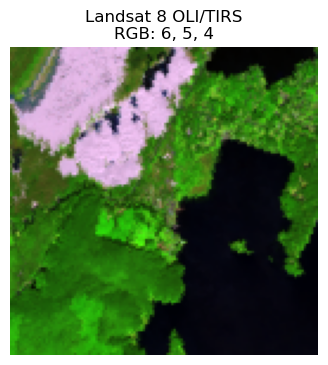

In [9]:
# Retrieve a sample from the dataset
# This will fetch the actual imagery from Google Earth Engine
item = l8_dunes.__getitem__(dunes)

# Visualize the sample using the dataset's built-in plotting method
# This creates a false-color composite (typically using SWIR, NIR, Red bands)
print("Visualizing Landsat 8 imagery:")
l8_dunes.plot(item);

## Examine Sample Structure

Let's explore what information is contained in the sample dictionary returned by the dataset.

In [10]:
# Display the keys available in the sample dictionary
print("Sample dictionary keys:")
sample_keys = item.keys()
for key in sample_keys:
    print(f"  - {key}")

print(f"\nThe sample contains {len(sample_keys)} main components.")

Sample dictionary keys:
  - crs
  - bbox
  - image

The sample contains 3 main components.


## Inspect Image Properties

Let's examine the technical properties of the retrieved imagery to understand its dimensions and data type.

In [11]:
# Check the shape of the image tensor
# The format is typically (bands, height, width)
print("Image shape (bands, height, width):")
print(item['image'].shape)
print(f"\nNumber of bands: {item['image'].shape[0]}")
print(f"Spatial dimensions: {item['image'].shape[1]}x{item['image'].shape[2]} pixels")

Image shape (bands, height, width):
torch.Size([7, 130, 130])

Number of bands: 7
Spatial dimensions: 130x130 pixels


In [12]:
# Check the data type of the image
print("Image data type:")
print(item['image'].dtype)
print("\nThis data type determines the precision and range of pixel values.")

Image data type:
torch.float32

This data type determines the precision and range of pixel values.


## Combining GEE Data with Local Raster Datasets

One of the key features of ForestVision is its ability to combine Google Earth Engine data with local raster datasets using TorchGeo's dataset operations.

### eMapRAGB Dataset

The `eMapRAGB` dataset provides Above Ground Biomass (AGB) estimates from the eMapR project. This is a local raster dataset that contains biomass estimates for forested areas.

Let's load this dataset and then combine it with our Landsat 8 imagery to create a training-ready dataset.

In [13]:
# Import the eMapRAGB dataset class
from forestvision.datasets import eMapRAGB

In [14]:
# Load the eMapR AGB dataset for 2018
# This dataset contains biomass estimates in Mg/ha (megagrams per hectare)
agb = eMapRAGB("../data/datasets/emapr", 2018)
print("eMapR AGB Dataset Information:")
print(agb)
print(f"\nAvailable bands: {agb.bands}")
print(f"No data value: {agb.nodata}")

eMapR AGB Dataset Information:
eMapRAGB Dataset
    type: GeoDataset
    bbox: BoundingBox(minx=-2356065.0, maxx=2258204.999999999, miny=272055.00000000047, maxy=3172575.0, mint=0.0, maxt=9.223372036854776e+18)
    size: 1

Available bands: []
No data value: -32768


### Dataset Intersection Operation

We can use TorchGeo's intersection operator (`&`) to create a combined dataset that contains both the Landsat 8 imagery and the AGB biomass estimates. This creates aligned samples where both datasets have valid data.

In [ ]:
# Create an intersection dataset combining Landsat 8 and AGB data
# This ensures both datasets have coverage in the same spatial areas
agb_l8 = agb & l8_dunes
print("Combined Dataset (AGB ∩ Landsat 8):")
print(agb_l8)
print("\nThis combined dataset can be used for training machine learning models")
print("that predict biomass from satellite imagery.")

Combined Dataset (Landsat 8 ∩ AGB):
IntersectionDataset Dataset
    type: IntersectionDataset
    bbox: BoundingBox(minx=-2219976.5070072114, maxx=-2216076.5070072114, miny=2650010.507788832, maxy=2653910.507788832, mint=0.0, maxt=0.0)
    size: 1

This combined dataset can be used for training machine learning models
that predict biomass from satellite imagery.


### Retrieve Combined Sample

Let's fetch a sample from the combined dataset to see what information it contains.

In [16]:
# Get a sample from the combined dataset
train_sample = agb_l8.__getitem__(dunes)

# Display the keys available in the combined sample
print("Combined sample keys:")
for key in train_sample.keys():
    print(f"  - {key}")

print(f"\nThe combined sample contains data from both datasets.")

Combined sample keys:
  - crs
  - bbox
  - mask
  - image

The combined sample contains data from both datasets.


### Visualize the Combined Data

Let's visualize both the AGB biomass mask and the Landsat 8 imagery to understand what we're working with.

Visualizing AGB biomass estimates:


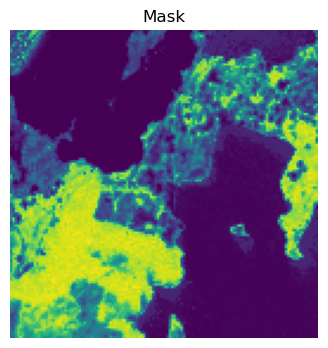

In [17]:
# Plot the AGB biomass mask
# This shows the biomass estimates across our ROI
print("Visualizing AGB biomass estimates:")
agb.plot(train_sample);

Visualizing corresponding Landsat 8 imagery:


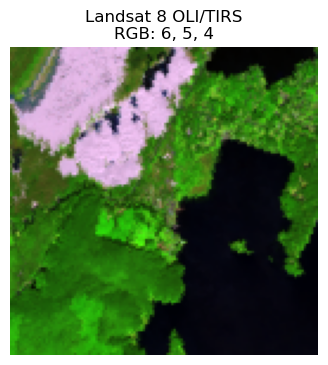

In [18]:
# Plot the Landsat 8 imagery
# This shows the satellite imagery that corresponds to the biomass estimates
print("Visualizing corresponding Landsat 8 imagery:")
l8_dunes.plot(train_sample);

In [19]:
hoodr = BoundingBox(
   -1966733.477785707, 
   -1962833.477785707, 
    2786024.527248912, 
    2789924.527248912, 
    0, 
    0
)

In [20]:
l8_hoodr = GEELandsat8(2020, roi=hoodr)

In [21]:
l8 = l8_hoodr | l8_dunes
print(l8)

UnionDataset Dataset
    type: UnionDataset
    bbox: BoundingBox(minx=-2219976.5070072114, maxx=-1962833.477785707, miny=2650010.507788832, maxy=2789924.527248912, mint=0.0, maxt=0.0)
    size: 2


## Advanced GEE Processing: Landsat FTV Dataset

One of the powerful features of Google Earth Engine is its ability to perform complex processing pipelines on the fly. ForestVision leverages this capability through specialized datasets like `GEELandsatFTV`.

### LandTrendr Algorithm

The `GEELandsatFTV` dataset uses the [LandTrendr](https://emapr.github.io/LT-GEE/) (Landsat-based Detection of Trends in Disturbance and Recovery) algorithm to generate Forest Trend Visualization (FTV) images. LandTrendr is a time-series segmentation algorithm that:

- Analyzes multi-year Landsat imagery
- Detects forest disturbance and recovery patterns
- Identifies trends in vegetation health over time
- Creates composite images that highlight change patterns

### FTV Output Bands

By default, the FTV dataset returns a leaf-on medoid composite with eight bands:
1. **NBR** (Normalized Burn Ratio) - For detecting burned areas and vegetation stress
2. **B1** (Coastal/Aerosol) - For coastal water and aerosol studies
3. **B2** (Blue) - For water body penetration and atmospheric correction
4. **B3** (Green) - For measuring plant vigor
5. **B4** (Red) - For chlorophyll absorption
6. **B5** (NIR) - For biomass content and vegetation delineation
7. **B7** (SWIR 2) - For moisture content and vegetation stress
8. **RMSE** (Root Mean Square Error) - For assessing model fit quality

This combination provides a comprehensive view of vegetation health and change patterns.

In [22]:
# Create a Landsat FTV dataset for our ROI
# This uses LandTrendr to generate change detection imagery
ftv = GEELandsatFTV(2024, roi=dunes)
print("Landsat FTV Dataset Information:")
print(ftv)
print(f"\nAvailable bands: {ftv.bands}")
print(f"No data value: {ftv.nodata}")

Landsat FTV Dataset Information:
GEELandsatFTV Dataset
    type: GeoDataset
    bbox: BoundingBox(minx=-2219976.5070072114, maxx=-2216076.5070072114, miny=2650010.507788832, maxy=2653910.507788832, mint=0.0, maxt=0.0)
    size: 1

Available bands: ['NBR', 'B1', 'B2', 'B3', 'B4', 'B5', 'B7', 'RMSE']
No data value: -32768


### Retrieve and Visualize FTV Sample

Let's fetch a sample from the FTV dataset and visualize the results of the LandTrendr processing.

Visualizing LandTrendr FTV results:


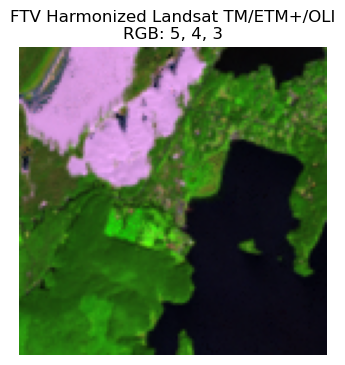

In [23]:
# Get a sample from the FTV dataset
item_ftv = ftv.__getitem__(dunes)

# Visualize the FTV imagery
# This shows the results of the LandTrendr change detection analysis
print("Visualizing LandTrendr FTV results:")
ftv.plot(item_ftv);

### Examine FTV Dataset Properties

Let's explore the technical properties of the FTV dataset to understand its capabilities.

In [24]:
# Check the no data value used by the dataset
print("No data value:")
print(ftv.nodata)
print("\nThis value indicates pixels with missing or invalid data.")

No data value:
-32768

This value indicates pixels with missing or invalid data.


In [25]:
# Check the available bands in the FTV dataset
print("Available bands:")
print(ftv.bands)
print(f"\nThe FTV dataset provides {len(ftv.bands)} bands for analysis.")

Available bands:
['NBR', 'B1', 'B2', 'B3', 'B4', 'B5', 'B7', 'RMSE']

The FTV dataset provides 8 bands for analysis.


In [26]:
# Check the shape of the FTV image
print("FTV image shape (bands, height, width):")
print(item_ftv["image"].shape)
print(f"\nSpatial dimensions: {item_ftv['image'].shape[1]}x{item_ftv['image'].shape[2]} pixels")

FTV image shape (bands, height, width):
torch.Size([8, 130, 130])

Spatial dimensions: 130x130 pixels


In [27]:
# Check the date range used for the FTV analysis
print("Analysis date range:")
print(f"Start date: {ftv.date_start}")
print(f"End date: {ftv.date_end}")
print("\nThis shows the temporal window used for the LandTrendr analysis.")

Analysis date range:
Start date: 2004-04-01
End date: 2024-09-30

This shows the temporal window used for the LandTrendr analysis.
